<a href="https://colab.research.google.com/github/lancelotzomax/2021/blob/master/Seasonal_effect_on_negative_emotions_by_polarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonal effect on negative emotions (Part 2 - by polarity)
**Seasonal Affective Disorder (SAD)** is a form of depression due to seasonal changes. Environmental factors such as climates (rainfall, air pullution), sunlight and temperature influece humans' emotions. People may depress in specific seasons (e.g., autumn and winter) while recover from others (e.g., spring and summer). Hence, an investigation into the impact of seasonal changes on human's negative emotion can be conducted to better understand its influence.

To study the seasonal effect on speakers' emotions, we perform sentiment analysis using TextBlob, and analyze the difference in the value of polarity over different months in the year 2015, 2017, 2018 and 2019*.

The following sub-sections elucidate the details of the model.

### 1. Data Collection & Import
The quote datasets from the year 2015, 2017, 2018, and 2019 are extracted using the 'Tutorial_Notebook' provided by the TA. The first 1 million quote data in each year are considered for this research. Each quote’s data consist of 11 attributes: ID ('Unnamed: 0'), quoteID, quotation, speaker, qids, date, numOccurrences, probas, urls, phase ,and domains. 


### 2. Pre-processing
Pre-processing helps clean and filter the data required to undergo sentiment analysis. The process includes:

* Extract the attributes of 'quotation', 'speaker', and 'date' from the original dataset of 1 million quotes and form a new dataframe

* Parse the date and assign 'year' 'month' and 'date' into the dataframe

### 3. Sentiment Analysis 
In this step, sentiment analysis is performed using sentiment analysis in Textblob. 'Polarity' and 'subjectivity' are measured and recorded into the dataframe. Here, only the quotes with the values of polarity smaller than or equal to 0 are considered for the negative emotion analysis. We then split the dataframe by month and form 12 dataframes.

### 4. Bootstraping

In this step, we randomly booostrap 10000 samples from the dataframe of each month, and we repeat it for 30 times. The means of bootsrapped 10000 samples in each month are calculated and recorded.


### 5. Plotting
Here, we make a boxplot descriping the number of quotes related to anxiety depression words in each month. 
In the following programming, the datasets from these 4 years undergo the aforementioned steps year by year. In the summary, a figure of multiplte boxplots explicating the value of polarity in each month in different years is plotted, and a line plot with errorbars is plotted to elucidate the variation in the value of polarity over months.


Ps. The data in 2016 and 2020 are ignored in our analysis as the lack amount of data in these two years may not be representative to present the anxiety depression over seasons.)



Mount the Google Drive to link to the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import package

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import nltk, sklearn
import matplotlib.pyplot as plt

# Import textblob to perform sentiment analysis 
from textblob import TextBlob
from sklearn.utils import resample

# Import nltk to conduct word tokenization
from nltk import wordpunct_tokenize
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Process dataset in 2015

### 1. Data Collection & Import 


In [3]:
sample_2015 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2015_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2015

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,['Q270316'],2015-08-31 02:10:00,2,"[['Jeanne Shaheen', '0.742'], ['None', '0.2359...",['http://www.unionleader.com/article/20150831/...,E,"['com', 'com']"
1,1,2015-12-08-029916,How FFA scored 32 own goals in 18 months and C...,None,[],2015-12-08 00:00:00,2,"[['None', '0.563'], ['David Gallop', '0.437']]",['http://feeds.theroar.com.au/~r/theroar/~3/tZ...,E,"['com.au', 'com.au']"
2,2,2015-09-10-000206,[ Amy ] was placed under an unacceptable amoun...,None,[],2015-09-10 21:18:59,1,"[['None', '0.9634'], ['Amy Robinson', '0.0366']]",['http://www.thefashionspot.com/buzz-news/late...,E,['com']
3,3,2015-07-23-032707,How High Will These Numbers Go?,None,[],2015-07-23 14:57:49,3,"[['None', '0.9019'], ['Chubby Checker', '0.098...","['http://www.billboard.com/node/6641719', 'htt...",E,"['com', 'com', 'com']"
4,4,2015-10-04-000115,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,['Q1253'],2015-10-04 08:27:38,2,"[['Ban Ki-moon', '0.8399'], ['None', '0.1601']]",['http://muslimnews.co.uk/news/middle-east/afg...,E,"['co.uk', 'co.uk']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-08-19-043795,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,['Q1064771'],2015-08-19 02:23:07,2,"[['Randy Wolf', '0.4833'], ['None', '0.412'], ...",['http://www.cbssports.com/mlb/writer/jon-heym...,E,"['com', 'com']"
999996,999996,2015-04-16-001100,A lot of that can only come from getting live ...,William Worth,['Q1401372'],2015-04-16 19:03:00,2,"[['William Worth', '0.7726'], ['None', '0.2274']]",['http://www.baltimoresun.com/sports/college/f...,E,"['com', 'com']"
999997,999997,2015-10-14-055008,I'm delighted that I was able to get 12 games ...,Freddie Woodman,['Q20127322'],2015-10-14 12:35:26,1,"[['Freddie Woodman', '0.7456'], ['None', '0.25...",['http://thefa.com/news/england/development/20...,E,['com']
999998,999998,2015-09-30-002515,A lot of the hard work has been done in the le...,Anne Field,['Q19335418'],2015-09-30 18:00:00,2,"[['Anne Field', '0.5315'], ['None', '0.4685']]",['http://dailyliberal.com.au/story/3393888/exc...,E,"['com.au', 'com.au']"


### 2. Pre-processing

In [4]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2015)
selected_columns_2015 = sample_2015[['quotation', 'speaker', 'date']]

# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2015[['year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2015)):
  dt = dateutil.parser.isoparse(selected_columns_2015.date[row])
  selected_columns_2015.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2015.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2015.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2015

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,quotation,speaker,date,year,month,day
0,... a great day for veterans here in Littleton...,Jeanne Shaheen,2015-08-31 02:10:00,2015,08,31
1,How FFA scored 32 own goals in 18 months and C...,None,2015-12-08 00:00:00,2015,12,08
2,[ Amy ] was placed under an unacceptable amoun...,None,2015-09-10 21:18:59,2015,09,10
3,How High Will These Numbers Go?,None,2015-07-23 14:57:49,2015,07,23
4,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,2015-10-04 08:27:38,2015,10,04
...,...,...,...,...,...,...
999995,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,2015-08-19 02:23:07,2015,08,19
999996,A lot of that can only come from getting live ...,William Worth,2015-04-16 19:03:00,2015,04,16
999997,I'm delighted that I was able to get 12 games ...,Freddie Woodman,2015-10-14 12:35:26,2015,10,14
999998,A lot of the hard work has been done in the le...,Anne Field,2015-09-30 18:00:00,2015,09,30


### 3. Sentiment Analysis


In [5]:
# Create a column called 'polarity' and a column called
# 'subjectivity' to store the value from sentiment analysis
lst_polarity = []
lst_subjectivity = []

for element in range(len(selected_columns_2015)):
    blob = TextBlob(selected_columns_2015.quotation[element])
    sent = blob.sentiment
    lst_polarity.append(sent[0])
    lst_subjectivity.append(sent[1])

selected_columns_2015['polarity'] = lst_polarity
selected_columns_2015['subjectivity'] = lst_subjectivity

selected_columns_2015

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,quotation,speaker,date,year,month,day,polarity,subjectivity
0,... a great day for veterans here in Littleton...,Jeanne Shaheen,2015-08-31 02:10:00,2015,08,31,0.433333,0.450000
1,How FFA scored 32 own goals in 18 months and C...,None,2015-12-08 00:00:00,2015,12,08,0.600000,1.000000
2,[ Amy ] was placed under an unacceptable amoun...,None,2015-09-10 21:18:59,2015,09,10,-0.175000,0.300000
3,How High Will These Numbers Go?,None,2015-07-23 14:57:49,2015,07,23,0.160000,0.540000
4,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,2015-10-04 08:27:38,2015,10,04,0.000000,0.000000
...,...,...,...,...,...,...,...,...
999995,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,2015-08-19 02:23:07,2015,08,19,0.000000,0.533333
999996,A lot of that can only come from getting live ...,William Worth,2015-04-16 19:03:00,2015,04,16,0.159091,0.625000
999997,I'm delighted that I was able to get 12 games ...,Freddie Woodman,2015-10-14 12:35:26,2015,10,14,0.485455,0.472091
999998,A lot of the hard work has been done in the le...,Anne Field,2015-09-30 18:00:00,2015,09,30,-0.291667,0.541667


In [6]:
# Only Consider the dataset with polarity <= 0 
negative_polarity_rows_2015 = selected_columns_2015[selected_columns_2015.polarity <= 0]
negative_polarity_rows_2015

,quotation,speaker,date,year,month,day,polarity,subjectivity
2,[ Amy ] was placed under an unacceptable amoun...,None,2015-09-10 21:18:59,2015,09,10,-0.175000,0.300000
4,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,2015-10-04 08:27:38,2015,10,04,0.000000,0.000000
5,How Indian values and karma can help business ...,Sri Sri Ravi Shankar,2015-06-19 15:32:16,2015,06,19,0.000000,0.000000
6,[ But ] We were able to network within our com...,Jamal Rifi,2015-08-31 22:59:36,2015,08,31,-0.040000,0.525000
8,[ C ] harter operators working through third-p...,Diane Ravitch,2015-12-10 17:51:45,2015,12,10,0.000000,0.000000
...,...,...,...,...,...,...,...,...
999988,A lot of people think that when the Republican...,Jimmy Fallon,2015-11-30 00:17:24,2015,11,30,-0.085185,0.618519
999990,A lot of people up there can't get jobs. They ...,Donald Trump,2015-08-10 14:32:51,2015,08,10,0.000000,0.000000
999994,A lot of stuff can happen and I couldn't have ...,David Brown,2015-02-17 01:17:51,2015,02,17,-0.050000,0.400000
999995,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,2015-08-19 02:23:07,2015,08,19,0.000000,0.533333


In [7]:
# Split the dataframe by month
neg_jan_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '01']
neg_feb_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '02']
neg_mar_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '03']
neg_apr_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '04']
neg_may_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '05']
neg_jun_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '06']
neg_jul_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '07']
neg_aug_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '08']
neg_sep_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '09']
neg_oct_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '10']
neg_nov_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '11']
neg_dec_data_2015 = negative_polarity_rows_2015[negative_polarity_rows_2015.month == '12']

### 4. Bootstraping

In [8]:
lst_neg_2015 = []
lst_neg_2015_month = []

# repeat to bootstrap 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  neg_jan_sample_data_2015 = resample(neg_jan_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_feb_sample_data_2015 = resample(neg_feb_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_mar_sample_data_2015 = resample(neg_mar_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_apr_sample_data_2015 = resample(neg_apr_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_may_sample_data_2015 = resample(neg_may_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_jun_sample_data_2015 = resample(neg_jun_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_jul_sample_data_2015 = resample(neg_jul_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_aug_sample_data_2015 = resample(neg_aug_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_sep_sample_data_2015 = resample(neg_sep_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_oct_sample_data_2015 = resample(neg_oct_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_nov_sample_data_2015 = resample(neg_nov_data_2015, n_samples = 10000, replace = False, random_state = i)
  neg_dec_sample_data_2015 = resample(neg_dec_data_2015, n_samples = 10000, replace = False, random_state = i)

  # Conbine sample data of 12 months into one dataframe
  jan_mean_2015 = neg_jan_sample_data_2015.polarity.mean()
  feb_mean_2015 = neg_feb_sample_data_2015.polarity.mean()
  mar_mean_2015 = neg_mar_sample_data_2015.polarity.mean()
  apr_mean_2015 = neg_apr_sample_data_2015.polarity.mean()
  may_mean_2015 = neg_may_sample_data_2015.polarity.mean()
  jun_mean_2015 = neg_jun_sample_data_2015.polarity.mean()
  jul_mean_2015 = neg_jul_sample_data_2015.polarity.mean()
  aug_mean_2015 = neg_aug_sample_data_2015.polarity.mean()
  sep_mean_2015 = neg_sep_sample_data_2015.polarity.mean()
  oct_mean_2015 = neg_oct_sample_data_2015.polarity.mean()
  nov_mean_2015 = neg_nov_sample_data_2015.polarity.mean()
  dec_mean_2015 = neg_dec_sample_data_2015.polarity.mean()

  mean_series = [jan_mean_2015, feb_mean_2015, mar_mean_2015, apr_mean_2015, may_mean_2015, jun_mean_2015, 
          jul_mean_2015, aug_mean_2015, sep_mean_2015, oct_mean_2015, nov_mean_2015, dec_mean_2015]
  
  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2015 & the corresponding month into lst_2015_month

  lst_neg_2015.append(mean_series)
  lst_neg_2015_month.append(month)

In [9]:
# As we randomly sample the data for 30 times, lst_2015 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_neg_2015)


30

### 5. Plotting

In [10]:
# Convert lst_neg_2015 & lst_neg_2015_month into a 360x2 dataframe
lst_2015_array = np.array(lst_neg_2015)
lst_2015_month_array = np.array(lst_neg_2015_month) 

reshaped1 = lst_2015_array.reshape((360, 1))
reshaped2 = lst_2015_month_array.reshape((360, 1))

lst_2015_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2015_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2015 = pd.concat([lst_2015_array_df, lst_2015_month_array_df], axis=1, join='inner')
df_2015

,number,month
0,-0.078463,Jan
1,-0.075757,Feb
2,-0.074982,Mar
3,-0.075970,Apr
4,-0.080395,May
...,...,...
355,-0.072933,Aug
356,-0.073607,Sep
357,-0.075757,Oct
358,-0.079659,Nov


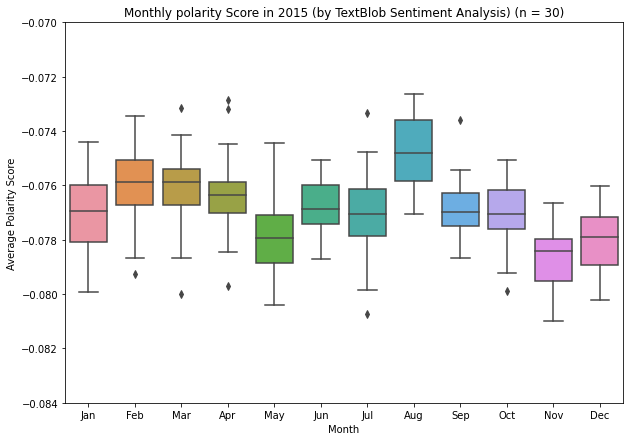

In [11]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2015)
plt.xlabel("Month")
plt.ylabel("Average Polarity Score")
plt.title('Monthly polarity Score in 2015 (by TextBlob Sentiment Analysis) (n = 30)')
y_ticks = np.arange(-0.084, -0.068, 0.002)
plt.yticks(y_ticks)

plt.savefig('Polarity_Score_in_2015')

##Process data in 2017

### 1. Data Collection & Import 

In [12]:
sample_2017 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2017_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2017

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2017-05-01-000095,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,['Q6377094'],2017-05-01 17:00:00,1,"[['Kathryn Minshew', '0.7832'], ['None', '0.21...",['http://www.salon.com/2017/05/01/watch-do-com...,E,['com']
1,1,2017-09-12-090806,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,['Q185165'],2017-09-12 00:00:00,14,"[['Olivia Newton-John', '0.5358'], ['None', '0...",['http://www.femalefirst.co.uk/celebrity/olivi...,E,"['co.uk', 'com', 'com', 'com', 'com', 'com', '..."
2,2,2017-10-24-000065,[ Although ] it highlights the urgent need for...,Radha Stirling,['Q7280196'],2017-10-24 23:57:43,2,"[['Radha Stirling', '0.7996'], ['None', '0.155...",['https://uk.news.yahoo.com/briton-caught-duba...,E,"['com', 'com']"
3,3,2017-12-04-073931,I've had both knees replaced and I walk with a...,None,[],2017-12-04 01:57:56,1,"[['None', '0.7649'], ['Paul Crowley', '0.2351']]",['https://www.itemlive.com/2017/12/03/lynn-sen...,E,['com']
4,4,2017-06-08-000150,"... and if the data so warrants, act for a bro...",Viral Acharya,['Q28076452'],2017-06-08 09:51:00,2,"[['Viral Acharya', '0.9557'], ['None', '0.0443']]",['http://economictimes.indiatimes.com/mf/analy...,E,"['com', 'com']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2017-05-24-146387,"You have been to the brink of death and back, ...",Larry Bird,['Q190152'],2017-05-24 04:52:05,1,"[['Larry Bird', '0.4201'], ['None', '0.3167'],...",['http://www.vvdailypress.com/news/20170523/pa...,E,['com']
999996,999996,2017-04-04-073336,It's weird because you start realising very qu...,Matt Okine,['Q17612856'],2017-04-04 06:09:05,1,"[['Matt Okine', '0.7874'], ['None', '0.2126']]",['http://junkee.com/sleep-much-now-pathetic-ma...,E,['com']
999997,999997,2017-10-24-167465,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,['Q42428503'],2017-10-24 21:04:36,1,"[['Michael Leitner', '0.6156'], ['None', '0.38...",['http://bcheights.com/2017/10/24/leitner-help...,E,['com']
999998,999998,2017-03-19-033000,It's when we start to hear from people that so...,Matt Schwartz,['Q17277187'],2017-03-19 04:00:27,1,"[['Matt Schwartz', '0.5986'], ['None', '0.4014']]",['http://www.nola.com/business/index.ssf/2017/...,E,['com']


### 2. Pre-processing

In [13]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2017)
selected_columns_2017 = sample_2017[['quotation', 'speaker', 'date']]

# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2017[['year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2017)):
  dt = dateutil.parser.isoparse(selected_columns_2017.date[row])
  selected_columns_2017.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2017.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2017.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2017

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,quotation,speaker,date,year,month,day
0,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,2017-05-01 17:00:00,2017,05,01
1,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,2017-09-12 00:00:00,2017,09,12
2,[ Although ] it highlights the urgent need for...,Radha Stirling,2017-10-24 23:57:43,2017,10,24
3,I've had both knees replaced and I walk with a...,None,2017-12-04 01:57:56,2017,12,04
4,"... and if the data so warrants, act for a bro...",Viral Acharya,2017-06-08 09:51:00,2017,06,08
...,...,...,...,...,...,...
999995,"You have been to the brink of death and back, ...",Larry Bird,2017-05-24 04:52:05,2017,05,24
999996,It's weird because you start realising very qu...,Matt Okine,2017-04-04 06:09:05,2017,04,04
999997,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,2017-10-24 21:04:36,2017,10,24
999998,It's when we start to hear from people that so...,Matt Schwartz,2017-03-19 04:00:27,2017,03,19


### 3. Sentiment Analysis

In [14]:
# Create a column called 'polarity' and a column called 'subjectivity' to store the value from sentiment analysis
lst_polarity = []
lst_subjectivity = []

for element in range(len(selected_columns_2017)):
    blob = TextBlob(selected_columns_2017.quotation[element])
    sent = blob.sentiment
    lst_polarity.append(sent[0])
    lst_subjectivity.append(sent[1])

selected_columns_2017['polarity'] = lst_polarity
selected_columns_2017['subjectivity'] = lst_subjectivity

selected_columns_2017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,quotation,speaker,date,year,month,day,polarity,subjectivity
0,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,2017-05-01 17:00:00,2017,05,01,0.322222,0.519444
1,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,2017-09-12 00:00:00,2017,09,12,0.400000,0.550000
2,[ Although ] it highlights the urgent need for...,Radha Stirling,2017-10-24 23:57:43,2017,10,24,0.000000,0.312500
3,I've had both knees replaced and I walk with a...,None,2017-12-04 01:57:56,2017,12,04,-0.600000,0.950000
4,"... and if the data so warrants, act for a bro...",Viral Acharya,2017-06-08 09:51:00,2017,06,08,0.000000,0.000000
...,...,...,...,...,...,...,...,...
999995,"You have been to the brink of death and back, ...",Larry Bird,2017-05-24 04:52:05,2017,05,24,0.157143,0.442857
999996,It's weird because you start realising very qu...,Matt Okine,2017-04-04 06:09:05,2017,04,04,-0.052381,0.750000
999997,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,2017-10-24 21:04:36,2017,10,24,0.000000,0.125000
999998,It's when we start to hear from people that so...,Matt Schwartz,2017-03-19 04:00:27,2017,03,19,-0.166667,0.500000


In [15]:
# Only Consider the dataset with polarity <= 0 
negative_polarity_rows_2017 = selected_columns_2017[selected_columns_2017.polarity <= 0]
negative_polarity_rows_2017

,quotation,speaker,date,year,month,day,polarity,subjectivity
2,[ Although ] it highlights the urgent need for...,Radha Stirling,2017-10-24 23:57:43,2017,10,24,0.000000,0.3125
3,I've had both knees replaced and I walk with a...,None,2017-12-04 01:57:56,2017,12,04,-0.600000,0.9500
4,"... and if the data so warrants, act for a bro...",Viral Acharya,2017-06-08 09:51:00,2017,06,08,0.000000,0.0000
5,I've had lots of support through the years and...,Tom Lord,2017-08-29 20:50:20,2017,08,29,0.000000,0.0000
6,"... As a leader, then, you want to encourage o...",Governor Kim Reynolds,2017-05-24 09:32:05,2017,05,24,-0.062500,0.2500
...,...,...,...,...,...,...,...,...
999989,You guys are [ expletive ].,None,2017-12-31 14:00:00,2017,12,31,0.000000,0.0000
999991,You guys can either be victims or you can take...,Mary-Frances Monroe,2017-10-11 04:38:12,2017,10,11,0.000000,0.0000
999996,It's weird because you start realising very qu...,Matt Okine,2017-04-04 06:09:05,2017,04,04,-0.052381,0.7500
999997,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,2017-10-24 21:04:36,2017,10,24,0.000000,0.1250


In [16]:
# Split the dataframe by month
neg_jan_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '01']
neg_feb_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '02']
neg_mar_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '03']
neg_apr_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '04']
neg_may_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '05']
neg_jun_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '06']
neg_jul_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '07']
neg_aug_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '08']
neg_sep_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '09']
neg_oct_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '10']
neg_nov_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '11']
neg_dec_data_2017 = negative_polarity_rows_2017[negative_polarity_rows_2017.month == '12']

### 4. Bootstraping

In [17]:
lst_neg_2017 = []
lst_neg_2017_month = []

# repeat to bootstrap 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  # As the number of data in January, 2017 is less than 10 thousand, we do not take the data in this month into consideration
  neg_feb_sample_data_2017 = resample(neg_feb_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_mar_sample_data_2017 = resample(neg_mar_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_apr_sample_data_2017 = resample(neg_apr_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_may_sample_data_2017 = resample(neg_may_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_jun_sample_data_2017 = resample(neg_jun_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_jul_sample_data_2017 = resample(neg_jul_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_aug_sample_data_2017 = resample(neg_aug_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_sep_sample_data_2017 = resample(neg_sep_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_oct_sample_data_2017 = resample(neg_oct_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_nov_sample_data_2017 = resample(neg_nov_data_2017, n_samples = 10000, replace = False, random_state = i)
  neg_dec_sample_data_2017 = resample(neg_dec_data_2017, n_samples = 10000, replace = False, random_state = i)

  # Conbine sample data of 12 months into one dataframe
  feb_mean_2017 = neg_feb_sample_data_2017.polarity.mean()
  mar_mean_2017 = neg_mar_sample_data_2017.polarity.mean()
  apr_mean_2017 = neg_apr_sample_data_2017.polarity.mean()
  may_mean_2017 = neg_may_sample_data_2017.polarity.mean()
  jun_mean_2017 = neg_jun_sample_data_2017.polarity.mean()
  jul_mean_2017 = neg_jul_sample_data_2017.polarity.mean()
  aug_mean_2017 = neg_aug_sample_data_2017.polarity.mean()
  sep_mean_2017 = neg_sep_sample_data_2017.polarity.mean()
  oct_mean_2017 = neg_oct_sample_data_2017.polarity.mean()
  nov_mean_2017 = neg_nov_sample_data_2017.polarity.mean()
  dec_mean_2017 = neg_dec_sample_data_2017.polarity.mean()

  mean_series = [feb_mean_2017, mar_mean_2017, apr_mean_2017, may_mean_2017, jun_mean_2017, 
          jul_mean_2017, aug_mean_2017, sep_mean_2017, oct_mean_2017, nov_mean_2017, dec_mean_2017]
  
  # define the month in which the data derive from
  month = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2017 & the corresponding month into lst_2017_month

  lst_neg_2017.append(mean_series)
  lst_neg_2017_month.append(month)

In [18]:
# As we randomly sample the data for 30 times, lst_2015 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_neg_2017)


30

### 5. Plotting


In [19]:
# Convert lst_neg_2015 & lst_neg_2015_month into a 360x2 dataframe
lst_2017_array = np.array(lst_neg_2017)
lst_2017_month_array = np.array(lst_neg_2017_month) 

reshaped1 = lst_2017_array.reshape((330, 1))
reshaped2 = lst_2017_month_array.reshape((330, 1))

lst_2017_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2017_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2017 = pd.concat([lst_2017_array_df, lst_2017_month_array_df], axis=1, join='inner')
df_2017

,number,month
0,-0.081360,Feb
1,-0.077364,Mar
2,-0.076734,Apr
3,-0.076071,May
4,-0.074128,Jun
...,...,...
325,-0.078453,Aug
326,-0.075512,Sep
327,-0.076880,Oct
328,-0.077450,Nov


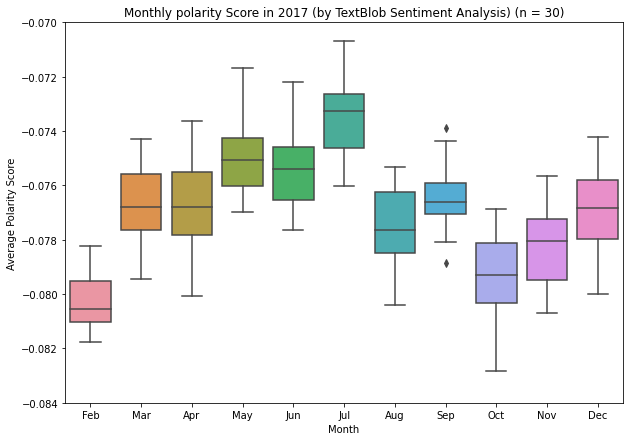

In [20]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2017)
plt.xlabel("Month")
plt.ylabel("Average Polarity Score")
plt.title('Monthly polarity Score in 2017 (by TextBlob Sentiment Analysis) (n = 30)')
y_ticks = np.arange(-0.084, -0.068, 0.002)
plt.yticks(y_ticks)

plt.savefig('Polarity_Score_in_2017')

##Process data in 2018

### 1. Data Collection & Import 

In [21]:
sample_2018 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2018_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2018

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2018-06-30-000005,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,['Q55997400'],2018-06-30 07:00:00,3,"[['Marcus Eriksen', '0.6814'], ['None', '0.318...",['http://www.santacruzsentinel.com/environment...,E,"['com', 'com', 'com']"
1,1,2018-12-06-000021,... a race to see who could sail around the wo...,James Marsh,"['Q2720543', 'Q41757028', 'Q56510432', 'Q61389...",2018-12-06 12:00:34,1,"[['James Marsh', '0.6787'], ['None', '0.3213']]",['http://filmthreat.com/reviews/the-mercy/'],E,['com']
2,2,2018-04-25-000107,... a tyrant whose chin might be lumps of grap...,None,[],2018-04-25 03:48:37,2,"[['None', '0.7475'], ['Oliver Stone', '0.1527'...",['https://slate.com/culture/2018/04/heres-how-...,E,"['com', 'com']"
3,3,2018-06-28-000032,[ Alberto ] attempted at this time to resolve ...,None,[],2018-06-28 04:01:03,2,"[['None', '0.6688'], ['El Patron', '0.3312']]",['http://comicbook.com/2018/06/28/alberto-el-p...,E,"['com', 'com']"
4,4,2018-09-15-000010,... Among the many observations I have receive...,None,[],2018-09-15 00:05:14,1,"[['None', '0.9496'], ['Pope Francis', '0.0504']]",['http://wjla.com/news/local/facing-calls-to-r...,E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2018-09-07-012816,"But perhaps more importantly, these techniques...",Leo Smith,"['Q6524244', 'Q6524245']",2018-09-07 11:34:23,1,"[['Leo Smith', '0.9198'], ['None', '0.0802']]",['https://www.digitaltrends.com/cool-tech/anat...,E,['com']
999996,999996,2018-10-04-014443,But riders will be upset that the critically-n...,Craig Richards,"['Q5181367', 'Q5181370', 'Q5181371']",2018-10-04 01:34:51,2,"[['Craig Richards', '0.9278'], ['None', '0.072...",['http://www.smh.com.au/national/victoria/busy...,E,"['com.au', 'com.au']"
999997,999997,2018-07-05-010899,But salvation is on its way and there is a sol...,Andrea Leadsom,['Q750091'],2018-07-05 11:50:00,2,"[['Andrea Leadsom', '0.9093'], ['None', '0.090...",['https://stv.tv/news/politics/1421928-snp-mps...,E,"['tv', 'com']"
999998,999998,2018-07-23-011483,But... she just wanted to keep pushing... all ...,None,[],2018-07-23 00:00:00,1,"[['None', '0.7298'], ['Ronda Rousey', '0.1168'...",['http://www.foxnews.com/entertainment/2018/07...,E,['com']


### 2. Pre-processing

In [22]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2018 = sample_2018[['quotation', 'speaker', 'date']]

# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2018[['year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2018)):
  dt = dateutil.parser.isoparse(selected_columns_2018.date[row])
  selected_columns_2018.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2018.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2018.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2018

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,quotation,speaker,date,year,month,day
0,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,2018-06-30 07:00:00,2018,06,30
1,... a race to see who could sail around the wo...,James Marsh,2018-12-06 12:00:34,2018,12,06
2,... a tyrant whose chin might be lumps of grap...,None,2018-04-25 03:48:37,2018,04,25
3,[ Alberto ] attempted at this time to resolve ...,None,2018-06-28 04:01:03,2018,06,28
4,... Among the many observations I have receive...,None,2018-09-15 00:05:14,2018,09,15
...,...,...,...,...,...,...
999995,"But perhaps more importantly, these techniques...",Leo Smith,2018-09-07 11:34:23,2018,09,07
999996,But riders will be upset that the critically-n...,Craig Richards,2018-10-04 01:34:51,2018,10,04
999997,But salvation is on its way and there is a sol...,Andrea Leadsom,2018-07-05 11:50:00,2018,07,05
999998,But... she just wanted to keep pushing... all ...,None,2018-07-23 00:00:00,2018,07,23


### 3. Sentiment Analysis

In [23]:
# Create a column called 'polarity' and a column called 'subjectivity' to store the value from sentiment analysis
lst_polarity = []
lst_subjectivity = []

for element in range(len(selected_columns_2018)):
    blob = TextBlob(selected_columns_2018.quotation[element])
    sent = blob.sentiment
    lst_polarity.append(sent[0])
    lst_subjectivity.append(sent[1])

selected_columns_2018['polarity'] = lst_polarity
selected_columns_2018['subjectivity'] = lst_subjectivity

selected_columns_2018

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,quotation,speaker,date,year,month,day,polarity,subjectivity
0,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,2018-06-30 07:00:00,2018,06,30,0.000000,0.000000
1,... a race to see who could sail around the wo...,James Marsh,2018-12-06 12:00:34,2018,12,06,0.000000,0.000000
2,... a tyrant whose chin might be lumps of grap...,None,2018-04-25 03:48:37,2018,04,25,0.000000,0.000000
3,[ Alberto ] attempted at this time to resolve ...,None,2018-06-28 04:01:03,2018,06,28,0.137500,0.675000
4,... Among the many observations I have receive...,None,2018-09-15 00:05:14,2018,09,15,0.009091,0.438636
...,...,...,...,...,...,...,...,...
999995,"But perhaps more importantly, these techniques...",Leo Smith,2018-09-07 11:34:23,2018,09,07,0.209184,0.508844
999996,But riders will be upset that the critically-n...,Craig Richards,2018-10-04 01:34:51,2018,10,04,0.160000,0.540000
999997,But salvation is on its way and there is a sol...,Andrea Leadsom,2018-07-05 11:50:00,2018,07,05,0.040000,0.300000
999998,But... she just wanted to keep pushing... all ...,None,2018-07-23 00:00:00,2018,07,23,-0.050000,0.037500


In [24]:
# Only Consider the dataset with polarity <= 0 
negative_polarity_rows_2018 = selected_columns_2018[selected_columns_2018.polarity <= 0]
negative_polarity_rows_2018

,quotation,speaker,date,year,month,day,polarity,subjectivity
0,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,2018-06-30 07:00:00,2018,06,30,0.000000,0.000000
1,... a race to see who could sail around the wo...,James Marsh,2018-12-06 12:00:34,2018,12,06,0.000000,0.000000
2,... a tyrant whose chin might be lumps of grap...,None,2018-04-25 03:48:37,2018,04,25,0.000000,0.000000
6,... at least 10 years is what we can see in th...,Mark Thompson,2018-02-23 03:56:00,2018,02,23,-0.300000,0.400000
7,"[ Bhagwan ] had the dream, the vision, and I h...",Ma Anand Sheela,2018-04-02 06:23:00,2018,04,02,0.000000,0.000000
...,...,...,...,...,...,...,...,...
999989,"But on the other hand, our interests in being ...",Brian Job,2018-01-16 20:37:09,2018,01,16,-0.047222,0.551389
999990,but only a couple of days in [ and ] he's slig...,Robbie Brady,2018-09-14 18:43:19,2018,09,14,-0.200000,0.850000
999993,"But our hand was forced,",Brandon Lewis,2018-07-26 23:13:35,2018,07,26,-0.300000,0.200000
999998,But... she just wanted to keep pushing... all ...,None,2018-07-23 00:00:00,2018,07,23,-0.050000,0.037500


In [25]:
# Split the dataframe by month
neg_jan_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '01']
neg_feb_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '02']
neg_mar_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '03']
neg_apr_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '04']
neg_may_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '05']
neg_jun_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '06']
neg_jul_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '07']
neg_aug_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '08']
neg_sep_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '09']
neg_oct_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '10']
neg_nov_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '11']
neg_dec_data_2018 = negative_polarity_rows_2018[negative_polarity_rows_2018.month == '12']

### 4. Bootstraping

In [26]:
lst_neg_2018 = []
lst_neg_2018_month = []

# repeat to bootstrap 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  neg_jan_sample_data_2018 = resample(neg_jan_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_feb_sample_data_2018 = resample(neg_feb_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_mar_sample_data_2018 = resample(neg_mar_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_apr_sample_data_2018 = resample(neg_apr_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_may_sample_data_2018 = resample(neg_may_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_jun_sample_data_2018 = resample(neg_jun_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_jul_sample_data_2018 = resample(neg_jul_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_aug_sample_data_2018 = resample(neg_aug_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_sep_sample_data_2018 = resample(neg_sep_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_oct_sample_data_2018 = resample(neg_oct_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_nov_sample_data_2018 = resample(neg_nov_data_2018, n_samples = 10000, replace = False, random_state = i)
  neg_dec_sample_data_2018 = resample(neg_dec_data_2018, n_samples = 10000, replace = False, random_state = i)

  # Conbine sample data of 12 months into one dataframe
  jan_mean_2018 = neg_jan_sample_data_2018.polarity.mean()
  feb_mean_2018 = neg_feb_sample_data_2018.polarity.mean()
  mar_mean_2018 = neg_mar_sample_data_2018.polarity.mean()
  apr_mean_2018 = neg_apr_sample_data_2018.polarity.mean()
  may_mean_2018 = neg_may_sample_data_2018.polarity.mean()
  jun_mean_2018 = neg_jun_sample_data_2018.polarity.mean()
  jul_mean_2018 = neg_jul_sample_data_2018.polarity.mean()
  aug_mean_2018 = neg_aug_sample_data_2018.polarity.mean()
  sep_mean_2018 = neg_sep_sample_data_2018.polarity.mean()
  oct_mean_2018 = neg_oct_sample_data_2018.polarity.mean()
  nov_mean_2018 = neg_nov_sample_data_2018.polarity.mean()
  dec_mean_2018 = neg_dec_sample_data_2018.polarity.mean()

  mean_series = [jan_mean_2018, feb_mean_2018, mar_mean_2018, apr_mean_2018, may_mean_2018, jun_mean_2018, 
          jul_mean_2018, aug_mean_2018, sep_mean_2018, oct_mean_2018, nov_mean_2018, dec_mean_2018]
  
  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2018 & the corresponding month into lst_2018_month

  lst_neg_2018.append(mean_series)
  lst_neg_2018_month.append(month)

In [27]:
# As we randomly sample the data for 30 times, lst_2018 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_neg_2018)


30

### 5. Plotting

In [28]:
# Convert lst_neg_2018 & lst_neg_2018_month into a 360x2 dataframe
lst_2018_array = np.array(lst_neg_2018)
lst_2018_month_array = np.array(lst_neg_2018_month) 

reshaped1 = lst_2018_array.reshape((360, 1))
reshaped2 = lst_2018_month_array.reshape((360, 1))

lst_2018_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2018_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2018 = pd.concat([lst_2018_array_df, lst_2018_month_array_df], axis=1, join='inner')
df_2018

,number,month
0,-0.079723,Jan
1,-0.076287,Feb
2,-0.077224,Mar
3,-0.077936,Apr
4,-0.076023,May
...,...,...
355,-0.075638,Aug
356,-0.078660,Sep
357,-0.078578,Oct
358,-0.077168,Nov


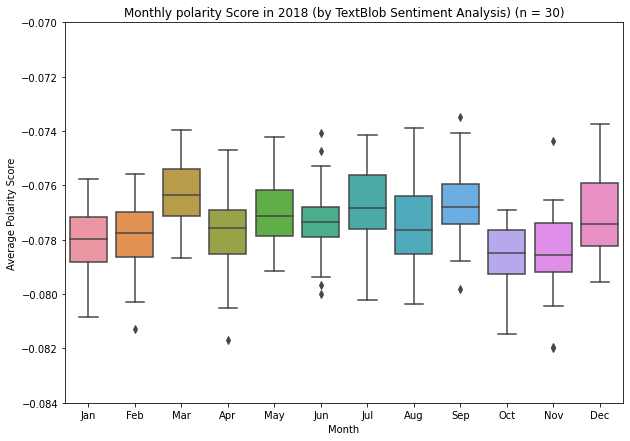

In [29]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2018)
plt.xlabel("Month")
plt.ylabel("Average Polarity Score")
plt.title('Monthly polarity Score in 2018 (by TextBlob Sentiment Analysis) (n = 30)')
y_ticks = np.arange(-0.084, -0.068, 0.002)
plt.yticks(y_ticks)

plt.savefig('Polarity_Score_in_2018')

##Process data in 2019

### 1. Data Collection & Import 


In [30]:
sample_2019 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2019_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2019

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2019-10-14-000009,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,[],2019-10-14 07:30:00,1,"[['None', '0.5595'], ['Julio Morales', '0.4405']]",['http://www.ivpressonline.com/news/local/ivc-...,E,['com']
1,1,2019-04-08-048753,It is immoral. It is harmful. It is hurtful.,President Donald Trump,['Q22686'],2019-04-08 16:22:00,44,"[['President Donald Trump', '0.5802'], ['None'...",['https://www.mercedsunstar.com/news/business/...,E,"['com', 'com', 'com', 'com', 'com', 'com', 'co..."
2,2,2019-07-17-000030,"[ Amber ] loves her son more than anything,",None,[],2019-07-17 22:54:35,1,"[['None', '0.8276'], ['Amber Portwood', '0.172...",['https://www.inquisitr.com/5535969/did-amber-...,E,['com']
3,3,2019-05-15-053302,It is important for our equine science student...,Sally Johnson,['Q42336656'],2019-05-15 18:03:22,1,"[['Sally Johnson', '0.5721'], ['None', '0.4279']]",['https://www.lanereport.com/113381/2019/05/qu...,E,['com']
4,4,2019-04-20-000011,... an Afrikaans family living in South Africa...,None,[],2019-04-20 22:30:57,1,"[['None', '0.8331'], ['you long', '0.1669']]",['http://filmthreat.com/reviews/the-harvester/'],E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2019-08-09-046378,It was a great time tonight with all the playe...,David Dill,['Q5232978'],2019-08-09 23:59:21,1,"[['David Dill', '0.7727'], ['None', '0.2273']]",['http://atleasttwopeople.wordpress.com/2019/0...,E,['com']
999996,999996,2019-07-08-002735,All in all I am really pleased with how the tr...,John Dempster,['Q6229145'],2019-07-08 15:55:43,2,"[['John Dempster', '0.8656'], ['None', '0.1345']]",['https://www.chad.co.uk/sport/football/mansfi...,E,"['co.uk', 'co.uk']"
999997,999997,2019-04-10-056895,It was a huge shift for the providers to reall...,Barbara Poppe,['Q4859227'],2019-04-10 06:00:54,1,"[['Barbara Poppe', '0.8828'], ['None', '0.1172']]",['https://www.seattletimes.com/seattle-news/ho...,E,['com']
999998,999998,2019-08-01-002864,All it needs is to give journalists normal acc...,None,[],2019-08-01 05:00:18,6,"[['None', '0.7118'], ['Hua Chunying', '0.2781'...",['http://www.digitaljournal.com/news/world/uig...,E,"['com', 'com', 'com', 'com', 'com.ph', 'com']"


### 2. Pre-processing

In [31]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2019 = sample_2019[['quotation', 'speaker', 'date']]

# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2019[['year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2019)):
  dt = dateutil.parser.isoparse(selected_columns_2019.date[row])
  selected_columns_2019.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2019.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2019.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2019

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,quotation,speaker,date,year,month,day
0,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,2019-10-14 07:30:00,2019,10,14
1,It is immoral. It is harmful. It is hurtful.,President Donald Trump,2019-04-08 16:22:00,2019,04,08
2,"[ Amber ] loves her son more than anything,",None,2019-07-17 22:54:35,2019,07,17
3,It is important for our equine science student...,Sally Johnson,2019-05-15 18:03:22,2019,05,15
4,... an Afrikaans family living in South Africa...,None,2019-04-20 22:30:57,2019,04,20
...,...,...,...,...,...,...
999995,It was a great time tonight with all the playe...,David Dill,2019-08-09 23:59:21,2019,08,09
999996,All in all I am really pleased with how the tr...,John Dempster,2019-07-08 15:55:43,2019,07,08
999997,It was a huge shift for the providers to reall...,Barbara Poppe,2019-04-10 06:00:54,2019,04,10
999998,All it needs is to give journalists normal acc...,None,2019-08-01 05:00:18,2019,08,01


### 3. Sentiment Analysis

In [32]:
# Create a column called 'polarity' and a column called 'subjectivity' to store the value from sentiment analysis
lst_polarity = []
lst_subjectivity = []

for element in range(len(selected_columns_2019)):
    blob = TextBlob(selected_columns_2019.quotation[element])
    sent = blob.sentiment
    lst_polarity.append(sent[0])
    lst_subjectivity.append(sent[1])

selected_columns_2019['polarity'] = lst_polarity
selected_columns_2019['subjectivity'] = lst_subjectivity

selected_columns_2019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,quotation,speaker,date,year,month,day,polarity,subjectivity
0,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,2019-10-14 07:30:00,2019,10,14,1.000000,1.000000
1,It is immoral. It is harmful. It is hurtful.,President Donald Trump,2019-04-08 16:22:00,2019,04,08,0.000000,0.000000
2,"[ Amber ] loves her son more than anything,",None,2019-07-17 22:54:35,2019,07,17,0.500000,0.500000
3,It is important for our equine science student...,Sally Johnson,2019-05-15 18:03:22,2019,05,15,0.366667,0.750000
4,... an Afrikaans family living in South Africa...,None,2019-04-20 22:30:57,2019,04,20,0.200000,0.400000
...,...,...,...,...,...,...,...,...
999995,It was a great time tonight with all the playe...,David Dill,2019-08-09 23:59:21,2019,08,09,0.800000,0.750000
999996,All in all I am really pleased with how the tr...,John Dempster,2019-07-08 15:55:43,2019,07,08,0.500000,1.000000
999997,It was a huge shift for the providers to reall...,Barbara Poppe,2019-04-10 06:00:54,2019,04,10,0.311111,0.533333
999998,All it needs is to give journalists normal acc...,None,2019-08-01 05:00:18,2019,08,01,0.150000,0.650000


In [33]:
# Only Consider the dataset with polarity <= 0 
negative_polarity_rows_2019 = selected_columns_2019[selected_columns_2019.polarity <= 0]
negative_polarity_rows_2019

,quotation,speaker,date,year,month,day,polarity,subjectivity
1,It is immoral. It is harmful. It is hurtful.,President Donald Trump,2019-04-08 16:22:00,2019,04,08,0.000000,0.000000
6,[ Area 51 ] is an open training range for the ...,None,2019-07-13 01:41:18,2019,07,13,0.000000,0.250000
8,... as to the proper process for the hiring an...,None,2019-01-15 23:02:40,2019,01,15,0.000000,0.050000
10,... as well as non-specialist units,None,2019-01-16 23:26:20,2019,01,16,0.000000,0.000000
12,[ Chilton ] put it on a little tape recorder a...,Sam the Sham,2019-02-21 11:05:34,2019,02,21,-0.187500,0.500000
...,...,...,...,...,...,...,...,...
999983,It was a disrespectful display that had nothin...,None,2019-08-01 23:03:27,2019,08,01,0.000000,0.000000
999984,All efforts are made to remove the restriction...,Joy Thomas,2019-09-24 21:36:23,2019,09,24,-0.022222,0.744444
999992,All I know is that life became a lot easier wh...,None,2019-09-20 16:31:14,2019,09,20,-0.125000,0.375000
999994,All I want to hear from them is how the busine...,Jim Cramer,2019-03-23 00:30:00,2019,03,23,0.000000,0.000000


In [34]:
# Split the dataframe by month
neg_jan_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '01']
neg_feb_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '02']
neg_mar_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '03']
neg_apr_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '04']
neg_may_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '05']
neg_jun_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '06']
neg_jul_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '07']
neg_aug_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '08']
neg_sep_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '09']
neg_oct_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '10']
neg_nov_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '11']
neg_dec_data_2019 = negative_polarity_rows_2019[negative_polarity_rows_2019.month == '12']

### 4. Bootstraping

In [35]:
lst_neg_2019 = []
lst_neg_2019_month = []

# repeat to bootstrap 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  neg_jan_sample_data_2019 = resample(neg_jan_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_feb_sample_data_2019 = resample(neg_feb_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_mar_sample_data_2019 = resample(neg_mar_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_apr_sample_data_2019 = resample(neg_apr_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_may_sample_data_2019 = resample(neg_may_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_jun_sample_data_2019 = resample(neg_jun_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_jul_sample_data_2019 = resample(neg_jul_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_aug_sample_data_2019 = resample(neg_aug_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_sep_sample_data_2019 = resample(neg_sep_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_oct_sample_data_2019 = resample(neg_oct_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_nov_sample_data_2019 = resample(neg_nov_data_2019, n_samples = 10000, replace = False, random_state = i)
  neg_dec_sample_data_2019 = resample(neg_dec_data_2019, n_samples = 10000, replace = False, random_state = i)

  # Conbine sample data of 12 months into one dataframe
  jan_mean_2019 = neg_jan_sample_data_2019.polarity.mean()
  feb_mean_2019 = neg_feb_sample_data_2019.polarity.mean()
  mar_mean_2019 = neg_mar_sample_data_2019.polarity.mean()
  apr_mean_2019 = neg_apr_sample_data_2019.polarity.mean()
  may_mean_2019 = neg_may_sample_data_2019.polarity.mean()
  jun_mean_2019 = neg_jun_sample_data_2019.polarity.mean()
  jul_mean_2019 = neg_jul_sample_data_2019.polarity.mean()
  aug_mean_2019 = neg_aug_sample_data_2019.polarity.mean()
  sep_mean_2019 = neg_sep_sample_data_2019.polarity.mean()
  oct_mean_2019 = neg_oct_sample_data_2019.polarity.mean()
  nov_mean_2019 = neg_nov_sample_data_2019.polarity.mean()
  dec_mean_2019 = neg_dec_sample_data_2019.polarity.mean()

  mean_series = [jan_mean_2019, feb_mean_2019, mar_mean_2019, apr_mean_2019, may_mean_2019, jun_mean_2019, 
          jul_mean_2019, aug_mean_2019, sep_mean_2019, oct_mean_2019, nov_mean_2019, dec_mean_2019]
  
  # define the month in which the data derive from
  month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

  # record the monthly number of anxiety rows into lst_2018 & the corresponding month into lst_2018_month

  lst_neg_2019.append(mean_series)
  lst_neg_2019_month.append(month)

In [36]:
# As we randomly sample the data for 30 times, lst_2019 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_neg_2019)

30

### 5. Plotting

In [37]:
# Convert lst_neg_2019 & lst_neg_2019_month into a 360x2 dataframe
lst_2019_array = np.array(lst_neg_2019)
lst_2019_month_array = np.array(lst_neg_2019_month) 

reshaped1 = lst_2019_array.reshape((360, 1))
reshaped2 = lst_2019_month_array.reshape((360, 1))

lst_2019_array_df = pd.DataFrame(reshaped1, columns=['number'])
lst_2019_month_array_df = pd.DataFrame(reshaped2, columns=['month'])

df_2019 = pd.concat([lst_2019_array_df, lst_2019_month_array_df], axis=1, join='inner')
df_2019


,number,month
0,-0.073281,Jan
1,-0.078638,Feb
2,-0.082786,Mar
3,-0.077433,Apr
4,-0.074745,May
...,...,...
355,-0.077889,Aug
356,-0.079486,Sep
357,-0.076184,Oct
358,-0.075226,Nov


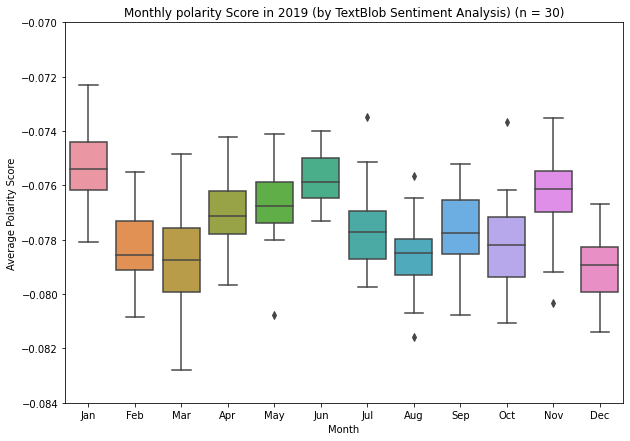

In [38]:
# Create plot
fig = plt.figure(figsize =(10, 7))

sns.color_palette("hls", 12)

sns.boxplot(x = 'month', y = 'number', data = df_2019)
plt.xlabel("Month")
plt.ylabel("Average Polarity Score")
plt.title('Monthly polarity Score in 2019 (by TextBlob Sentiment Analysis) (n = 30)')
y_ticks = np.arange(-0.084, -0.068, 0.002)
plt.yticks(y_ticks)

plt.savefig('Polarity_Score_in_2019')

##6. Summary

Figure of multiplte boxplots explicating the value of polarity in each month in different years

In [39]:
df_2015['year'] = 2015
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

df_all = pd.concat([df_2015, df_2017, df_2018, df_2019], axis=0, join='inner')

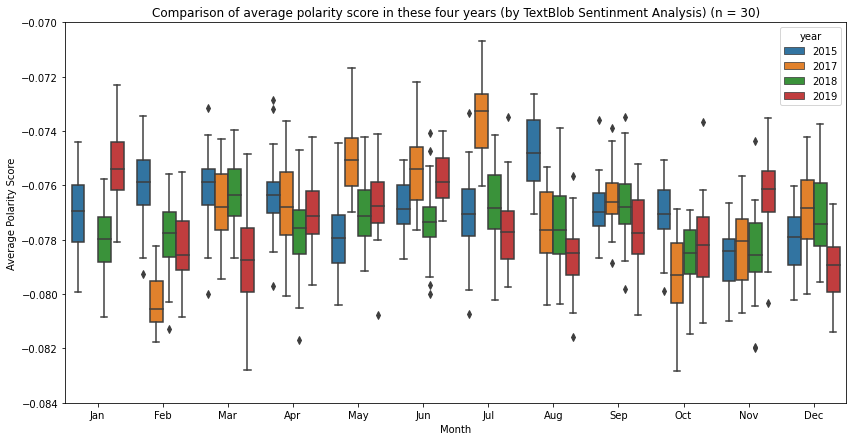

In [40]:
# Create plot
fig = plt.figure(figsize =(14, 7))

sns.boxplot(x = 'month', y = 'number', hue = 'year', data = df_all)
plt.xlabel("Month")
plt.ylabel("Average Polarity Score")
plt.title('Comparison of average polarity score in these four years (by TextBlob Sentinment Analysis) (n = 30)')
y_ticks = np.arange(-0.084, -0.068, 0.002)
plt.yticks(y_ticks)

plt.savefig('Polarity_Score_in_4_years')

Line plot with errorbars elucidating the variation in the value of polarity over months.

In [41]:
grouped_month = df_all.groupby(df_all.month)
grouped_month_mean = grouped_month.mean()
grouped_month_std = grouped_month.std()
grouped_month_mean = grouped_month_mean.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
grouped_month_std = grouped_month_std.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
grouped_month_mean

,number,year
month,,
Jan,-0.076760,2017.333333
Feb,-0.078136,2017.250000
Mar,-0.076977,2017.250000
Apr,-0.076957,2017.250000
May,-0.076617,2017.250000
Jun,-0.076316,2017.250000
Jul,-0.076249,2017.250000
Aug,-0.077052,2017.250000
Sep,-0.076947,2017.250000


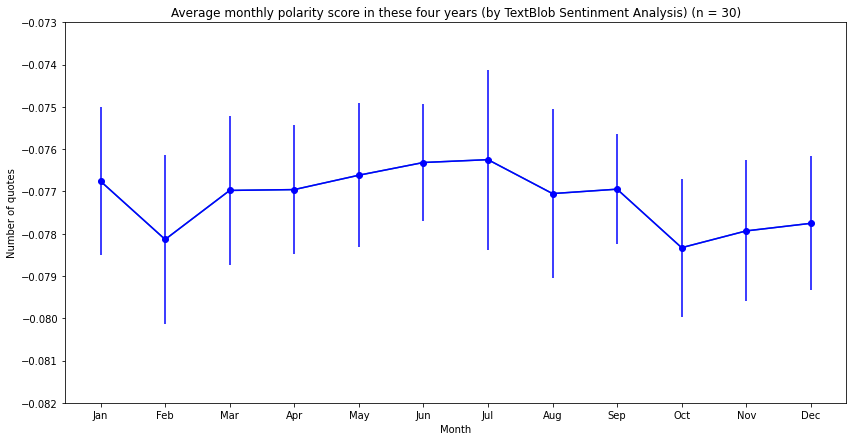

In [46]:
# Create plot
fig = plt.figure(figsize =(14, 7))

# sns.lineplot(x = grouped_month.index, y = 'number', data = grouped_month)
plt.plot(grouped_month_mean.index, grouped_month_mean.number)
plt.errorbar(grouped_month_mean.index, grouped_month_mean.number, yerr = grouped_month_std.number, fmt ='-bo')
grouped_month_std
plt.xlabel("Month")
plt.ylabel("Number of quotes")
plt.title('Average monthly polarity score in these four years (by TextBlob Sentinment Analysis) (n = 30)')

y_ticks = np.arange(-0.082, -0.073, 0.001)
plt.yticks(y_ticks)
plt.savefig('lineplot_in_4_years_by_Textblob', dpi=150)